# Table of Contents:
- Investigate data
- Ask questions
- Wrangle data :
- assess and clean data 
- Explore data
- Conclude
- Communication

## Investigate Data:
Fuel Economy Data This information is provided by the U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory

## Attribute Description :
- __Model:__ Vehicle make and model
- __Displ:__ Engine displacement - the size of an engine in liters
- __Cyl:__ The number of cylinders in a particular engine
- __Trans:__ Transmission Type and Number of Gears
- __Drive:__ Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
- __Fuel:__ Fuel Type
- __Cert Region:__ Certification Region Code
- __Sales Area:__ Certification Region Code
- __Stnd:__ Vehicle emissions standard code (View Vehicle Emissions Standards https://www.epa.gov/greenvehicles/federal-and-california-light-duty-vehicle-emissions-standards-air-pollutants)
- __Stnd Description:__ Vehicle emissions standard description
- __Underhood ID:__ This is a 12-digit ID number that can be found on the underhood emission label of every vehicle. It's required by the EPA to designate its "test group" or "engine family." This is explained more here https://www.epa.gov/vehicle-and-engine-certification/information-about-family-naming-conventions-vehicles-and-engines
- __Veh Class:__ EPA Vehicle Class
- __Air Pollution Score:__ Air pollution score (smog rating)
- __City MPG:__ Estimated city mpg (miles/gallon)
- __Hwy MPG:__ Estimated highway mpg (miles/gallon)
- __Cmb MPG:__ Estimated combined mpg (miles/gallon)
- __Greenhouse Gas Score:__ Greenhouse gas rating
- __SmartWay:__ Yes, No, or Elite
- __Comb CO2:__ Combined city/highway CO2 tailpipe emissions in grams per mile

## Ask questions :
- Are more models using alternative sources of fuel? By how much?
- How much have vehicle classes improved in fuel economy?
- What are the characteristics of SmartWay vehicles?
- What features are associated with better fuel economy?
- For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
- What are the top Five fuel efficient models

# Assess Data

In [1]:
# Importind neccessary labaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [2]:
# Importing smartway vehical list of 2021
list_21=pd.read_excel('Downloads/SmartWay Vehicle List for MY 2021.xlsx')
list_21

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
4,AUDI e-tron,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,MVGAT00.0AZE,standard SUV,10,78,77,78,10,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,VOLVO XC40 BEV,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,MVVXV00.0Z0A,small SUV,10,85,72,79,10,Elite
311,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,small SUV,7,26/56,28/57,27/57,9,Yes
312,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVVXJ02.0P3A,small SUV,7,26/56,28/57,27/57,9,Yes
313,VOLVO XC90,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,standard SUV,7,26/58,28/53,27/55,9,Yes


In [3]:
# Importing smartway vehical list of 2017
list_17=pd.read_excel('Downloads/SmartWay Vehicle List for MY 2017.xlsx')
list_17.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Smog Rating,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes
2,ACURA RLX,3.5,6.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,HHNXV03.5LK3,midsize car,8,29,30,29,7,Yes
3,ACURA RLX,3.5,6.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV03.5LK3,midsize car,8,29,30,29,7,Yes
4,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,HVGAV02.0A3A,small car,8,26,35,29,7,Yes


There are two columns which have same entities but the name of atributes are different in both datasets. 
These two columns are:
- Column name __'Cert Region'__ in 2021 list have same entities as colume having name __'Sales Area'__ have in 2017 list.Means, __'Cert Region'__ = __'Sales Area'__
- Column name __'Air Pollution Score'__ in 2021 list have same entities as colume having name __'Smog Rating'__  have in 2017 list.Means, __'Air Pollution Score'__ = __'Smog Rating'__

So, we have to change the column names for consistency. Also,renaming all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)

# Cleanig Datasets

#### Renaming Columns

In [4]:
list_17.rename(columns={'Sales Area':'Cert Region', 'Smog Rating':'Air Pollution Score'}, inplace = True)
# confirm changes
list_17.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes


In [5]:
# replace spaces with underscores and lowercase labels for 2017 List
list_17.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
list_17.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes


In [6]:
# replacing blank spaces with '_' 
#list_17.columns =[column.strip().lower().replace(" ", "_") for column in list_17.columns]

In [7]:
# replace spaces with underscores and lowercase labels for 2021 List
list_21.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
list_21.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes


In [8]:
# make sure columns of both datasets are equal
(list_17.columns == list_21.columns).all()

True

### Cleaning dataset of list 2021

In [9]:
list_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 315 non-null    object 
 1   displ                 224 non-null    float64
 2   cyl                   224 non-null    float64
 3   trans                 315 non-null    object 
 4   drive                 315 non-null    object 
 5   fuel                  315 non-null    object 
 6   cert_region           315 non-null    object 
 7   stnd                  315 non-null    object 
 8   stnd_description      315 non-null    object 
 9   underhood_id          315 non-null    object 
 10  veh_class             315 non-null    object 
 11  air_pollution_score   315 non-null    int64  
 12  city_mpg              315 non-null    object 
 13  hwy_mpg               315 non-null    object 
 14  cmb_mpg               315 non-null    object 
 15  greenhouse_gas_score  3

In [10]:
list_21['fuel'].value_counts()

Gasoline                168
Electricity              81
Gasoline/Electricity     56
Hydrogen                 10
Name: fuel, dtype: int64

In [11]:
list_21[list_21['fuel']=="Gasoline/Electricity"]

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
8,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
9,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
10,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
11,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
12,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes
13,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes


In [12]:
list_21[list_21['fuel']=='Gasoline/Electricity']

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
8,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
9,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
10,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
11,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
12,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes
13,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes


In [13]:
list_21[list_21['fuel']=='Gasoline']

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
24,BUICK Encore GX,1.3,3.0,CVT,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MGMXV01.3545,small SUV,7,30,32,31,7,Yes
25,BUICK Encore GX,1.3,3.0,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MGMXV01.3545,small SUV,7,30,32,31,7,Yes
28,CHEVROLET Malibu,1.5,4.0,CVT,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MGMXV01.5010,midsize car,7,29,36,32,7,Yes
29,CHEVROLET Malibu,1.5,4.0,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MGMXV01.5010,midsize car,7,29,36,32,7,Yes
30,CHEVROLET Trailblazer,1.3,3.0,CVT,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MGMXV01.3545,small SUV,7,29,33,31,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,VOLKSWAGEN Golf,1.4,4.0,SemiAuto-8,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MVGAV01.4V3P,small car,7,29,36,32,7,Yes
299,VOLKSWAGEN Jetta,1.4,4.0,Man-6,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MVGAV01.4V3P,small car,7,30,41,34,7,Yes
300,VOLKSWAGEN Jetta,1.4,4.0,Man-6,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MVGAV01.4V3P,small car,7,30,41,34,7,Yes
301,VOLKSWAGEN Jetta,1.4,4.0,SemiAuto-8,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MVGAV01.4V3P,small car,7,29,39,33,7,Yes


The veichles which can operate from two different type of fuels seem to have two differnet values in columns:__city_mpg__,__hwy_mpg__,__cmb_mpg__ which is seperated by __"/"__. In simple, we have two different observations in one row in some places.

So, we have to seperate these Observations.


Take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes.

In [14]:

# First, let's get all the hybrids in 2008
hb_21= list_21[list_21['fuel'].str.contains('/')]
hb_21

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
8,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
9,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
10,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
11,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
12,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes
13,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes


In [15]:
# create two copies of the 2021 hybrids dataframe
df1 = hb_21.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_21.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df2

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26/64,34/74,29/68,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25/43,29/64,27/50,10,Yes
8,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
9,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,25/72,33/80,28/75,10,Yes
10,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
11,BMW 330e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,22/64,30/71,25/67,9,Yes
12,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes
13,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,MBMXJ02.0H30,small car,7,24/59,29/72,26/64,9,Yes


In [16]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [17]:
df2.shape

(56, 17)

In [18]:
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,midsize car,7,26,34,29,10,Yes
1,AUDI A7,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,midsize car,7,26,34,29,10,Yes
2,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MVGAJ02.0A3P,small SUV,7,25,29,27,10,Yes
3,AUDI Q5,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,MVGAJ02.0A3P,small SUV,7,25,29,27,10,Yes
8,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,MBMXJ02.0H30,small car,7,25,33,28,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,VOLVO V60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVVXJ02.0P3A,station wagon,7,70,68,69,10,Yes
311,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,small SUV,7,56,57,57,9,Yes
312,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVVXJ02.0P3A,small SUV,7,56,57,57,9,Yes
313,VOLVO XC90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,standard SUV,7,58,53,55,9,Yes


In [19]:
# drop the original hybrid rows
list_21.drop(hb_21.index, inplace=True)

# add in our newly separated rows
list_21 = list_21.append(new_rows, ignore_index=True)

In [20]:
list_21

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI e-tron,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,MVGAT00.0AZE,standard SUV,10,78,77,78,10,Elite
1,AUDI e-tron,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,MVGAT00.0AZE,standard SUV,10,78,77,78,10,Elite
2,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,MVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite
3,AUDI e-tron Sportback,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,MVGAT00.0AZE,standard SUV,10,76,78,77,10,Elite
4,BMW i3s,NaN,NaN,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,MBMXV00.0I3B,small car,10,124,102,113,10,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,VOLVO V60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVVXJ02.0P3A,station wagon,7,70,68,69,10,Yes
367,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,small SUV,7,56,57,57,9,Yes
368,VOLVO XC60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,MVVXJ02.0P3A,small SUV,7,56,57,57,9,Yes
369,VOLVO XC90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,California LEV-III SULEV30,MVVXJ02.0P3A,standard SUV,7,58,53,55,9,Yes


In [21]:
list_21.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
stnd                     object
stnd_description         object
underhood_id             object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Changing datatypes

In [22]:
# Changing data type of city_mpg column
list_21['city_mpg'] = list_21['city_mpg'].astype(float)

In [23]:
# Changing data type of hwy_mpg column
list_21['hwy_mpg'] = list_21['hwy_mpg'].astype(float)

# Changing data type of cmb_mpg column
list_21['cmb_mpg'] = list_21['cmb_mpg'].astype(float)

### Fixing "cyl" column

In [24]:
list_21.dtypes # confirm results

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
stnd                     object
stnd_description         object
underhood_id             object
veh_class                object
air_pollution_score       int64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [25]:
list_21['cyl'].unique()

array([nan,  3.,  4.,  6.,  2.])

In [26]:
print(list_21['cyl'].isnull().sum()) # Checking Null values

91


In [27]:
# Replacing Null values with median of a particular column
list_21['cyl'].replace(np.nan,list_21['cyl'].median(), inplace=True)


list_21['displ'].replace(np.nan,list_21['displ'].mean(), inplace=True)

In [28]:
# Changing data type of cyl column
list_21['cyl'] = list_21['cyl'].astype(int)

### Cleaning dataset of list 2017

In [29]:
list_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 504 non-null    object 
 1   displ                 444 non-null    float64
 2   cyl                   444 non-null    float64
 3   trans                 504 non-null    object 
 4   drive                 504 non-null    object 
 5   fuel                  504 non-null    object 
 6   cert_region           504 non-null    object 
 7   stnd                  504 non-null    object 
 8   stnd_description      504 non-null    object 
 9   underhood_id          504 non-null    object 
 10  veh_class             504 non-null    object 
 11  air_pollution_score   504 non-null    int64  
 12  city_mpg              504 non-null    object 
 13  hwy_mpg               504 non-null    object 
 14  cmb_mpg               504 non-null    object 
 15  greenhouse_gas_score  5

In [30]:
hb_17=list_17[list_17['fuel'].str.contains('/')]

hb_17

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
6,AUDI A3 e-tron,1.4,4.0,AMS-6,2WD,Gasoline/Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HVGAV01.4V3B,small car,9,33/81,36/86,34/83,10,Elite
7,AUDI A3 e-tron,1.4,4.0,AMS-6,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,HVGAV01.4V3B,small car,8,33/81,36/86,34/83,10,Yes
16,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,CA,L3ULEV125,California LEV-III ULEV125,HBMXV02.0H48,small car,6,28/66,34/78,30/71,10,Yes
17,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline/Electricity,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0H48,small car,6,28/66,34/78,30/71,10,Yes
18,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3ULEV125,California LEV-III ULEV125,HBMXV02.0H48,large car,6,25/62,29/68,27/64,9,Yes
19,BMW 740e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0H48,large car,6,25/62,29/68,27/64,9,Yes
20,BMW X5 xDrive40e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,B5,Federal Tier 2 Bin 5,HBMXT02.0H20,standard SUV,5,23/55,25/57,24/56,8,Yes
21,BMW X5 xDrive40e,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,U2,California LEV-II ULEV,HBMXT02.0H20,standard SUV,6,23/55,25/57,24/56,8,Yes
26,BMW i3 REx,0.6,2.0,Auto-1,2WD,Gasoline/Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HBMXV00.6I3R,small car,9,36/118,33/103,35/111,10,Elite
27,BMW i3 REx,0.6,2.0,Auto-1,2WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,HBMXV00.6I3R,small car,8,36/118,33/103,35/111,10,Yes


In [31]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_17.copy()
df2 = hb_17.copy()
# df1

In [32]:
# apply split function to each column of each dataframe copy

# list of columns to split
split_columns = ['fuel','city_mpg', 'hwy_mpg','cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
# df1  no more /
# df2

In [33]:
# append the two dataframes
new_rows = df1.append(df2)
new_rows.tail()

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
384,PORSCHE Cayenne S e-Hybrid,3.0,6.0,AutoMan-8,4WD,Electricity,CA,U2,California LEV-II ULEV,HPRXT03.0PHV,standard SUV,6,47,45,46,8,Yes
467,TOYOTA Prius Prime,1.8,4.0,CVT,2WD,Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HTYXV01.8P35,midsize car,9,145,121,133,10,Elite
468,TOYOTA Prius Prime,1.8,4.0,CVT,2WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,HTYXV01.8P35,midsize car,8,145,121,133,10,Yes
502,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HVVXT02.0P3T,standard SUV,9,53,55,54,8,Yes
503,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,HVVXT02.0P3T,standard SUV,8,53,55,54,8,Yes


In [34]:
# drop each hybrid row from the original 2017 dataframe
list_17.drop(hb_17.index, inplace=True) # drop original one 

# append new_rows to list_17  
list_17 = list_17.append(new_rows,ignore_index=True)

In [35]:
list_17

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV02.4SH3,small car,6,25,35,29,7,Yes
2,ACURA RLX,3.5,6.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,HHNXV03.5LK3,midsize car,8,29,30,29,7,Yes
3,ACURA RLX,3.5,6.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV03.5LK3,midsize car,8,29,30,29,7,Yes
4,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,HVGAV02.0A3A,small car,8,26,35,29,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,PORSCHE Cayenne S e-Hybrid,3.0,6.0,AutoMan-8,4WD,Electricity,CA,U2,California LEV-II ULEV,HPRXT03.0PHV,standard SUV,6,47,45,46,8,Yes
544,TOYOTA Prius Prime,1.8,4.0,CVT,2WD,Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HTYXV01.8P35,midsize car,9,145,121,133,10,Elite
545,TOYOTA Prius Prime,1.8,4.0,CVT,2WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,HTYXV01.8P35,midsize car,8,145,121,133,10,Yes
546,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30/PZEV,California LEV-III SULEV30/PZEV,HVVXT02.0P3T,standard SUV,9,53,55,54,8,Yes


### Changing datatypes

In [36]:
# Changing data type of city_mpg column
list_17['city_mpg'] = list_17['city_mpg'].astype(float)

# Changing data type of hwy_mpg column
list_17['hwy_mpg'] = list_17['hwy_mpg'].astype(float)

# Changing data type of cmb_mpg column
list_17['cmb_mpg'] = list_17['cmb_mpg'].astype(float)

We cannot change the datatype of columns whhich have Nan values. 

So, first we have to remove Nan values from columns "cyl" and "displ"

### Fixing "cyl" and "displ"column 

In [37]:
list_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 548 non-null    object 
 1   displ                 488 non-null    float64
 2   cyl                   488 non-null    float64
 3   trans                 548 non-null    object 
 4   drive                 548 non-null    object 
 5   fuel                  548 non-null    object 
 6   cert_region           548 non-null    object 
 7   stnd                  548 non-null    object 
 8   stnd_description      548 non-null    object 
 9   underhood_id          548 non-null    object 
 10  veh_class             548 non-null    object 
 11  air_pollution_score   548 non-null    int64  
 12  city_mpg              548 non-null    float64
 13  hwy_mpg               548 non-null    float64
 14  cmb_mpg               548 non-null    float64
 15  greenhouse_gas_score  5

In [38]:
# Replacing Null values with median of a particular column
list_17['cyl'].replace(np.nan,list_17['cyl'].median(), inplace=True)


list_17['displ'].replace(np.nan,list_17['displ'].mean(), inplace=True)

In [39]:
# Changing data type of cyl column
list_17['cyl'] = list_17['cyl'].astype(int)

In [40]:
list_17.info() # conforming final results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 548 non-null    object 
 1   displ                 548 non-null    float64
 2   cyl                   548 non-null    int32  
 3   trans                 548 non-null    object 
 4   drive                 548 non-null    object 
 5   fuel                  548 non-null    object 
 6   cert_region           548 non-null    object 
 7   stnd                  548 non-null    object 
 8   stnd_description      548 non-null    object 
 9   underhood_id          548 non-null    object 
 10  veh_class             548 non-null    object 
 11  air_pollution_score   548 non-null    int64  
 12  city_mpg              548 non-null    float64
 13  hwy_mpg               548 non-null    float64
 14  cmb_mpg               548 non-null    float64
 15  greenhouse_gas_score  5

In [41]:
# save new datasets for next section
list_21.to_csv('SmartWay Vehicle List 2021.csv', index=False)
list_17.to_csv('SmartWay Vehicle List 2017.csv', index=False)

In [42]:
list_21['cert_region'].value_counts()

CA    186
FA    185
Name: cert_region, dtype: int64

In [43]:
fa_21= list_21[list_21['cert_region']=='FA']
fa_17= list_17[list_17['cert_region']=='FA']

## Q1: Are more models using alternative sources of fuel? By how much?

Gasoline       211
Electricity     48
Diesel           9
Hydrogen         3
Ethanol          2
Gas              2
Name: fuel, dtype: int64


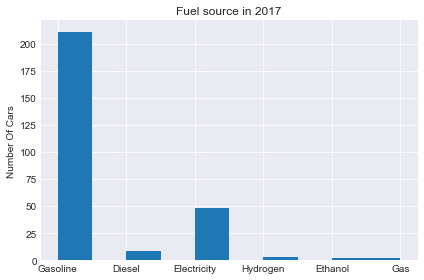

In [44]:
print(fa_17['fuel'].value_counts())

fa_17['fuel'].hist()

#plt.xlabel('Fuel Type')
plt.ylabel('Number Of Cars')
plt.title('Fuel source in 2017')
plt.tight_layout()
#plt.xticks(rotation= 35)
plt.show()

Gasoline       112
Electricity     68
Hydrogen         5
Name: fuel, dtype: int64


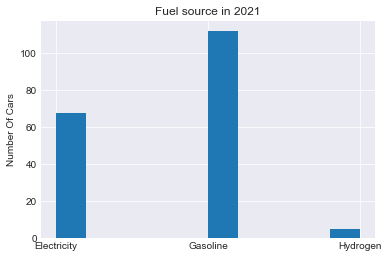

In [45]:
print(fa_21['fuel'].value_counts())

fa_21['fuel'].hist()

#plt.xlabel('Fuel Type')
plt.ylabel('Number Of Cars')
plt.title('Fuel source in 2021')
#plt.xticks(rotation= 35)
plt.show()

### Q2: How much have vehicle classes improved in fuel economy?

In [46]:
# Average city milage,heavy milage and combine milage of Cars in 2017.
veh_17=fa_17.groupby('veh_class').cmb_mpg.mean()
veh_17

veh_class
large car        56.692308
midsize car      44.433735
minivan          58.000000
small SUV        36.272727
small car        40.672414
standard SUV     53.533333
station wagon    41.000000
Name: cmb_mpg, dtype: float64

In [47]:
# Average city milage,heavy milage and combine milage of Cars in 2021.
veh_21=fa_21.groupby('veh_class').cmb_mpg.mean()
veh_21

veh_class
large car        60.750000
midsize car      58.489796
minivan          45.750000
small SUV        59.393939
small car        45.733333
standard SUV     50.941176
station wagon    75.235294
Name: cmb_mpg, dtype: float64

In [48]:
print('vehicle classes improved in fuel economy \n', veh_21 - veh_17)

vehicle classes improved in fuel economy 
 veh_class
large car         4.057692
midsize car      14.056061
minivan         -12.250000
small SUV        23.121212
small car         5.060920
standard SUV     -2.592157
station wagon    34.235294
Name: cmb_mpg, dtype: float64


### Q3: What are the characteristics of SmartWay vehicles?

In [49]:
fa_17.head()

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV02.4SH3,small car,6,25.0,35.0,29.0,7,Yes
3,ACURA RLX,3.5,6,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV03.5LK3,midsize car,8,29.0,30.0,29.0,7,Yes
5,AUDI A3,2.0,4,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HVGAV02.0A3A,small car,8,26.0,35.0,29.0,7,Yes
7,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HVGAJ02.0AAC,small car,6,27.0,37.0,31.0,7,Yes
8,BMW 328d,2.0,4,SemiAuto-8,2WD,Diesel,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0N47,small car,6,31.0,43.0,36.0,7,Yes


In [50]:
fa_17['smartway'].unique() # number of unique values in "smartway" column of 2017 dataset

array(['Yes', 'Elite'], dtype=object)

In [51]:
fa_17['smartway'].value_counts() # how many times a particular unique value is repeat in "smartway" column of 2017 dataset

Yes      244
Elite     31
Name: smartway, dtype: int64

In [52]:
fa_21['smartway'].unique() # number of unique values in "smartway" column of 2021 dataset

array(['Elite', 'Yes'], dtype=object)

In [53]:
fa_21['smartway'].value_counts() # how many times a particular unique value is repeat in "smartway" column of 2021 dataset

Yes      138
Elite     47
Name: smartway, dtype: int64

In [54]:
fa_17.describe() # Characteristics of 2017 SmartWay vehicles

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,1.866803,4.021818,7.149091,42.436364,46.945455,44.000000,8.061818
std,0.485111,0.546619,1.370821,28.596592,22.621463,25.714037,1.243889
min,0.600000,2.000000,5.000000,19.000000,23.000000,21.000000,7.000000
25%,1.500000,4.000000,6.000000,27.000000,35.000000,30.000000,7.000000
50%,1.866803,4.000000,7.000000,30.000000,38.000000,32.000000,8.000000
75%,2.000000,4.000000,8.000000,42.000000,43.000000,42.000000,9.000000
max,3.600000,6.000000,10.000000,150.000000,122.000000,136.000000,10.000000


In [55]:
fa_21.describe() # Characteristics of 2021 SmartWay vehicles

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.963571,3.978378,7.713514,57.048649,56.183784,56.362162,8.810811
std,0.398122,0.488529,1.314253,34.154585,26.925597,30.648492,1.290387
min,0.600000,2.000000,6.000000,18.000000,21.000000,19.000000,7.000000
25%,1.800000,4.000000,7.000000,29.000000,36.000000,32.000000,7.000000
50%,1.963571,4.000000,7.000000,44.000000,44.000000,44.000000,9.000000
75%,2.000000,4.000000,8.000000,75.000000,72.000000,75.000000,10.000000
max,3.600000,6.000000,10.000000,150.000000,133.000000,142.000000,10.000000


After comparing results of two datasets we can say that any vehicle having

                        displ               >= 0.60
                        cyl                  = 2
                        air_pollution_score >=5.0
                        city_mpg            > 17
                        hwy_mpg             > 20
                        cmb_mpg             > 18
                        greenhouse_gas_score = 7

are consider the smartway vehicle.

### Q4: What features are associated with better fuel economy?

In [56]:
fa_17.head(60)

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA ILX,2.400000,4,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HHNXV02.4SH3,small car,6,25.0,35.0,29.0,7,Yes
3,ACURA RLX,3.500000,6,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV03.5LK3,midsize car,8,29.0,30.0,29.0,7,Yes
5,AUDI A3,2.000000,4,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HVGAV02.0A3A,small car,8,26.0,35.0,29.0,7,Yes
7,AUDI A4 Ultra,2.000000,4,AMS-7,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,HVGAJ02.0AAC,small car,6,27.0,37.0,31.0,7,Yes
8,BMW 328d,2.000000,4,SemiAuto-8,2WD,Diesel,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0N47,small car,6,31.0,43.0,36.0,7,Yes
10,BMW 328d,2.000000,4,SemiAuto-8,4WD,Diesel,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0N47,small car,6,30.0,40.0,34.0,7,Yes
12,BMW 328d Sports Wagon,2.000000,4,SemiAuto-8,4WD,Diesel,FA,T3B125,Federal Tier 3 Bin 125,HBMXV02.0N47,station wagon,6,30.0,40.0,34.0,7,Yes
14,BMW i3 BEV,1.866803,4,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,HBMXV00.0I3B,small car,10,129.0,106.0,118.0,10,Elite
16,BMW i3 BEV (60Ah),1.866803,4,Auto-1,2WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,HBMXV00.0I3B,small car,10,137.0,111.0,124.0,10,Elite
19,BUICK Encore,1.400000,4,SemiAuto-6,2WD,Gasoline,FA,T3B110,Federal Tier 3 Transitional Bin 110,HGMXV01.4001,small SUV,6,27.0,33.0,30.0,7,Yes


we can find the better features which are associated with better fuel economy just by extracting Combine milage which are greater than the average combine milage.

In [57]:
# finding vichels which are giving more milages than average milage.
# because that vichel's features associated with better fuel economy.
fa_21[fa_21['cmb_mpg'] > fa_21['cmb_mpg'].mean()].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1.928834,3.941176,8.985294,95.088235,86.779412,90.955882,9.926471
std,0.305554,0.419038,1.440280,26.572197,19.187096,22.827343,0.262944
min,0.600000,2.000000,6.000000,56.000000,54.000000,57.000000,9.000000
25%,1.963571,4.000000,7.000000,70.750000,71.000000,70.000000,10.000000
50%,1.963571,4.000000,10.000000,98.500000,85.000000,92.500000,10.000000
75%,1.963571,4.000000,10.000000,115.500000,101.000000,110.000000,10.000000
max,3.600000,6.000000,10.000000,150.000000,133.000000,142.000000,10.000000


In [58]:
fa_17[fa_17['cmb_mpg'] > fa_17['cmb_mpg'].mean()].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.879851,4.049180,8.655738,88.426230,83.344262,85.737705,9.852459
std,0.374820,0.529976,1.569344,29.925162,23.451997,26.270961,0.477356
min,0.600000,2.000000,5.000000,45.000000,43.000000,46.000000,8.000000
25%,1.800000,4.000000,8.000000,56.000000,61.000000,58.000000,10.000000
50%,1.866803,4.000000,10.000000,91.000000,92.000000,93.000000,10.000000
75%,1.866803,4.000000,10.000000,113.000000,102.000000,106.000000,10.000000
max,3.600000,6.000000,10.000000,150.000000,122.000000,136.000000,10.000000


So, we find that the vehicle havig maximun __Engine displacement - the size of an engine in liters__ and maximum __cylinders__ in a particular engine is more fuel efficient. 

In [59]:
# save new datasets for next section
list_21.to_csv('SmartWay Vehicle List 2021.csv', index=False)
list_17.to_csv('SmartWay Vehicle List 2017.csv', index=False)

### Q4: For all of the models that were produced in 2017 that are still being produced in 2021, how much has the mpg improved and which vehicle improved the most?

In [60]:
# Merge datasets
# rename 2017 columns
fa_17.columns= [columns+ "_2017" for columns in fa_17.columns]
#list_17.rename(columns=lambda x: x +"_2017", inplace=True)

df_combined = pd.merge(fa_17,fa_21,left_on='model_2017', right_on='model', how='inner')

In [61]:

df_combined

,model_2017,displ_2017,cyl_2017,trans_2017,drive_2017,fuel_2017,cert_region_2017,stnd_2017,stnd_description_2017,underhood_id_2017,...,stnd,stnd_description,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,CHEVROLET Malibu,1.5,4,Auto-6,2WD,Gasoline,FA,T3B110,Federal Tier 3 Transitional Bin 110,HGMXV01.5002,...,T3B30,Federal Tier 3 Bin 30,MGMXV01.5010,midsize car,7,29.0,36.0,32.0,7,Yes
1,CHEVROLET Malibu,1.8,4,CVT,2WD,Gasoline,FA,T3B110,Federal Tier 3 Transitional Bin 110,HGMXV01.8050,...,T3B30,Federal Tier 3 Bin 30,MGMXV01.5010,midsize car,7,29.0,36.0,32.0,7,Yes
2,HONDA Accord,2.0,4,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV02.0J62,...,T3B30,Federal Tier 3 Bin 30,MHNXV01.53EB,large car,7,30.0,38.0,33.0,7,Yes
3,HONDA Accord,2.0,4,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV02.0J62,...,T3B30,Federal Tier 3 Bin 30,MHNXV02.0BEB,large car,7,48.0,48.0,48.0,9,Yes
4,HONDA Accord,2.4,4,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HHNXV02.41K3,...,T3B30,Federal Tier 3 Bin 30,MHNXV01.53EB,large car,7,30.0,38.0,33.0,7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,CHRYSLER Pacifica Hybrid,3.6,6,CVT,2WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,HCRXT03.65P0,...,T3B30,Federal Tier 3 Bin 30,MCRXT03.65P6,minivan,7,87.0,76.0,82.0,10,Yes
160,TOYOTA Prius Prime,1.8,4,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HTYXV01.8P35,...,T3B30,Federal Tier 3 Bin 30,MTYXV01.8P35,midsize car,7,55.0,53.0,54.0,10,Yes
161,TOYOTA Prius Prime,1.8,4,CVT,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,HTYXV01.8P35,...,T3B30,Federal Tier 3 Bin 30,MTYXV01.8P35,midsize car,7,145.0,121.0,133.0,10,Yes
162,TOYOTA Prius Prime,1.8,4,CVT,2WD,Electricity,FA,T3B30,Federal Tier 3 Bin 30,HTYXV01.8P35,...,T3B30,Federal Tier 3 Bin 30,MTYXV01.8P35,midsize car,7,55.0,53.0,54.0,10,Yes


In [62]:
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2017','cmb_mpg']]
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2017'] # Finding change in mpg of vehicles
model_mpg

,cmb_mpg_2017,cmb_mpg,mpg_change
model,,,
BMW 330e,50.500000,48.750000,-1.750000
CHEVROLET Malibu,38.000000,32.000000,-6.000000
CHRYSLER Pacifica Hybrid,58.000000,56.000000,-2.000000
HONDA Accord,33.200000,40.500000,7.300000
HONDA CR-V,29.500000,38.000000,8.500000
HONDA Civic 4Dr,34.142857,33.500000,-0.642857
HONDA Civic 5Dr,33.000000,33.000000,0.000000
HONDA Clarity,91.000000,73.333333,-17.666667
HYUNDAI Elantra,31.400000,36.000000,4.600000


### Q5: What are the top five fuel efficinet models?

In [73]:
model_mpg['cmb_mpg'].sort_values(ascending=False).iloc[0:5] # Top Five fuel efficient Models

model
TESLA Model 3 Long Range    134.0
HYUNDAI Ioniq Electric      133.0
KIA Soul Electric           114.0
NISSAN Leaf                 109.5
TOYOTA Prius Prime           93.5
Name: cmb_mpg, dtype: float64

In [63]:
model_mpg['mpg_change'].max() # maximum change 

20.5

In [64]:
# vehicels which improve most.

model_mpg[model_mpg['mpg_change'] == model_mpg['mpg_change'].max()]

,cmb_mpg_2017,cmb_mpg,mpg_change
model,,,
VOLVO S60,29.0,49.5,20.5
VOLVO V60,29.0,49.5,20.5


# Conclusion / Insights 


- Percentage of using alternate fuel source is increase a little.
- After comparing results of two datasets we can say that any vehicle having

                        displ               >= 0.60
                        cyl                  = 2
                        air_pollution_score >=5.0
                        city_mpg            > 17
                        hwy_mpg             > 20
                        cmb_mpg             > 18
                        greenhouse_gas_score = 7

  are consider the smartway vehicle.
- we find that the vehicle havig maximun __Engine displacement - the size of an engine in liters__ and maximum __cylinders__ in a particular engine is more fuel efficient.  
- Model __VOLVO S60__ and __VOLVO V60__ improved the most.
- Top Five fuel efficient models having combine mpg are:
       - TESLA Model 3 Long Range    134.0
       - HYUNDAI Ioniq Electric      133.0
       - KIA Soul Electric           114.0
       - NISSAN Leaf                 109.5
       - TOYOTA Prius Prime           93.5